## Importing dependenices and reading Data 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,RobustScaler
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\s_sad\Downloads\marketing_campaign.csv", sep='\t')
df = pd.DataFrame(data)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
#changing to lower case

df.columns  =df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   year_birth           2240 non-null   int64  
 2   education            2240 non-null   object 
 3   marital_status       2240 non-null   object 
 4   income               2216 non-null   float64
 5   kidhome              2240 non-null   int64  
 6   teenhome             2240 non-null   int64  
 7   dt_customer          2240 non-null   object 
 8   recency              2240 non-null   int64  
 9   mntwines             2240 non-null   int64  
 10  mntfruits            2240 non-null   int64  
 11  mntmeatproducts      2240 non-null   int64  
 12  mntfishproducts      2240 non-null   int64  
 13  mntsweetproducts     2240 non-null   int64  
 14  mntgoldprods         2240 non-null   int64  
 15  numdealspurchases    2240 non-null   i

### Feature Engineering 

There are only categorical variables namely education and marital status. we will start by cleaning them.

In [6]:
df.marital_status.value_counts() # we will try to summarize them.

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [7]:
def clean_marital_status_col(x):
    if x in ["Single", "Divorced","Widow", "Alone", "Absurd", "YOLO"]:
        return "Single"
    elif x in ['Married', 'Together']:
        return "Together"
df["marital_status"] = df["marital_status"].apply(clean_marital_status_col)
df["marital_status"] = df["marital_status"].apply(lambda x: clean_marital_status_col(x))
df.marital_status.value_counts()

Together    1444
Single       796
Name: marital_status, dtype: int64

In [8]:
df.education.value_counts() # it also shows too many unnecessary categories. we will try to summarize them.

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [9]:
def clean_education_col(x):
    if x in ["Basic", "2n Cycle"]:
        return "Undergraduate"
    elif x in ["Graduation","Master"]:
        return "Graduate"
    else:
        return x
df['education'] = df['education'].apply(lambda x: clean_education_col(x))
df.education.value_counts()

Graduate         1497
PhD               486
Undergraduate     257
Name: education, dtype: int64

In order to get some useful insights from data, we can create few more useful columns

In [10]:
# 1. creating new column with name "spending"
df['spending'] = df['mntwines']+df['mntfruits']+df['mntmeatproducts']+ df['mntfishproducts']+df['mntsweetproducts']+df['mntgoldprods']

# 2. total number of children at home
df['children'] = df['kidhome'] + df['teenhome']


#3. total number of campaigns accepted by each customer
df['total_accepted_camp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']

# 4. Column year of birth of customer is not useful, we will try to extract age of customer from this column

df['dt_customer'] = pd.to_datetime(df['dt_customer']) # converting datatype of to datetime
df['dt_customer'].max() # latest registration date of a customer is 2014
df['age'] = 2014-df['year_birth']#.astype(int)
print("The youngest customer:", df.age.min())
print("The oldest customer:", df.age.max())


The youngest customer: 18
The oldest customer: 121


In [11]:
# renaming columns: 
df=df.rename(columns={'numwebpurchases': "web_purchases",
                              'numstorepurchases':'store_purchase',
                              'mntwines': 'wine','mntfruits': 'fruits', 'mntmeatproducts': 'meat', 
                              'mntfishproducts': 'fish', 'mntsweetproducts': 'sweets','mntgoldprods': 'gold',
                              'numdealspurchases': 'discount_purchases', 'numcatalogpurchases': 'catalog_purchases', 
                             'numwebvisitsmonth': 'web_visits_monthly'})
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'wine', 'fruits', 'meat', 'fish',
       'sweets', 'gold', 'discount_purchases', 'web_purchases',
       'catalog_purchases', 'store_purchase', 'web_visits_monthly',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'spending', 'children', 'total_accepted_camp', 'age'],
      dtype='object')

After cleaning columns, we can now decide to delete few columns that don't look very important for analysis.

In [12]:
# deleting unnecessary columns
df.drop(columns =['year_birth','id', 'dt_customer','acceptedcmp3','acceptedcmp4','acceptedcmp5','acceptedcmp1','acceptedcmp2', 'z_costcontact','z_revenue'], axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   education            2240 non-null   object 
 1   marital_status       2240 non-null   object 
 2   income               2216 non-null   float64
 3   kidhome              2240 non-null   int64  
 4   teenhome             2240 non-null   int64  
 5   recency              2240 non-null   int64  
 6   wine                 2240 non-null   int64  
 7   fruits               2240 non-null   int64  
 8   meat                 2240 non-null   int64  
 9   fish                 2240 non-null   int64  
 10  sweets               2240 non-null   int64  
 11  gold                 2240 non-null   int64  
 12  discount_purchases   2240 non-null   int64  
 13  web_purchases        2240 non-null   int64  
 14  catalog_purchases    2240 non-null   int64  
 15  store_purchase       2240 non-null   i

In [14]:
# data is relatively clean. For the income column we will try to replace nan with mean value.
df['income'].fillna((df['income'].mean()), inplace=True)
df.isna().sum()

education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
recency                0
wine                   0
fruits                 0
meat                   0
fish                   0
sweets                 0
gold                   0
discount_purchases     0
web_purchases          0
catalog_purchases      0
store_purchase         0
web_visits_monthly     0
complain               0
response               0
spending               0
children               0
total_accepted_camp    0
age                    0
dtype: int64

### Separating Categorical and numerical Variables 

In [15]:
numerical_df = df.select_dtypes(include = np.number)
numerical_df

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,1617,0,0,57
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,27,2,0,60
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,776,0,0,49
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,53,1,0,30
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,422,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,1341,1,0,47
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,444,3,1,68
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,1241,0,1,33
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,843,1,0,58


In [16]:
categorical_df = df.select_dtypes(include = np.object)
categorical_df

,education,marital_status
0,Graduate,Single
1,Graduate,Single
2,Graduate,Together
3,Graduate,Together
4,PhD,Together
...,...,...
2235,Graduate,Together
2236,PhD,Together
2237,Graduate,Single
2238,Graduate,Together


In [17]:
numerical_df.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'wine', 'fruits', 'meat',
       'fish', 'sweets', 'gold', 'discount_purchases', 'web_purchases',
       'catalog_purchases', 'store_purchase', 'web_visits_monthly', 'complain',
       'response', 'spending', 'children', 'total_accepted_camp', 'age'],
      dtype='object')

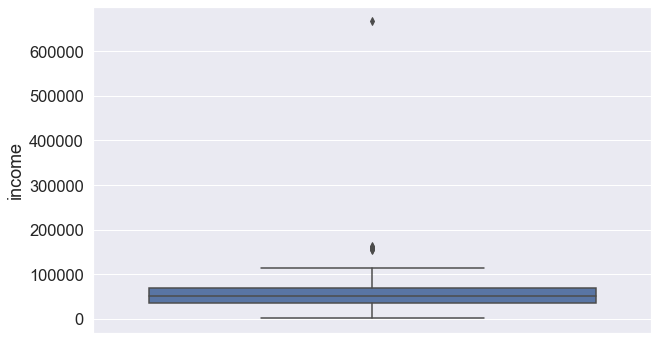

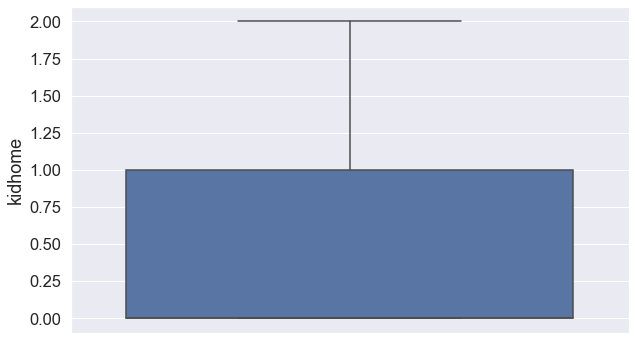

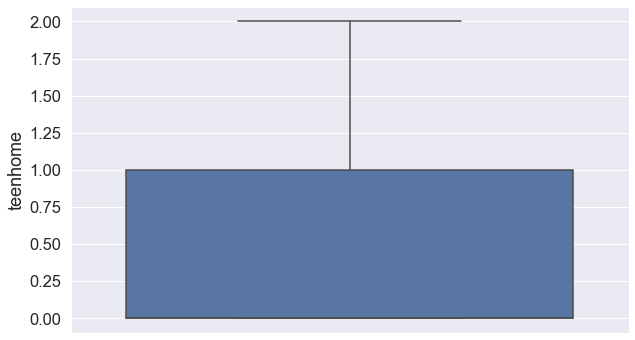

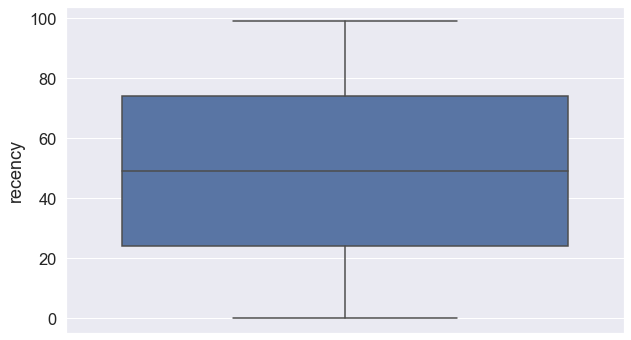

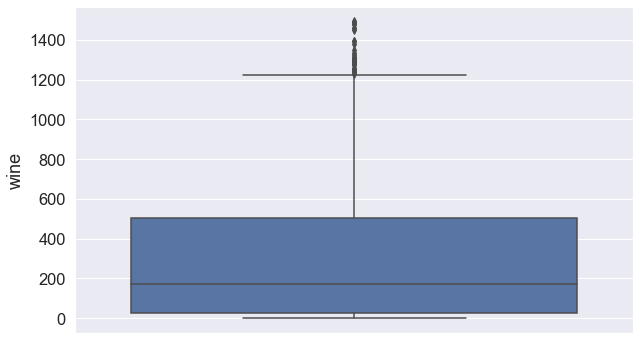

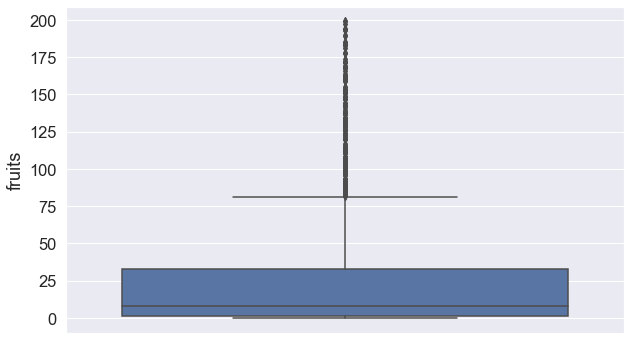

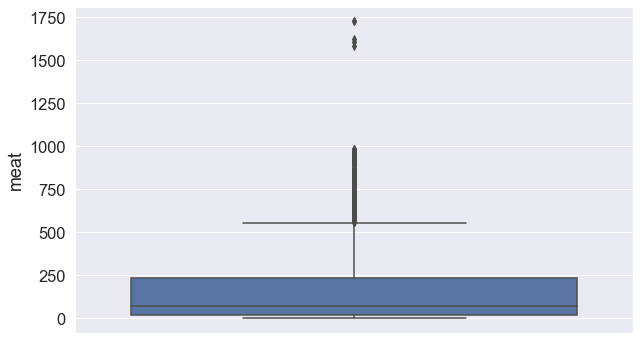

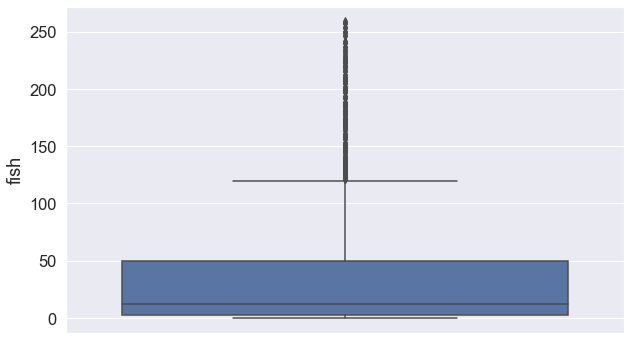

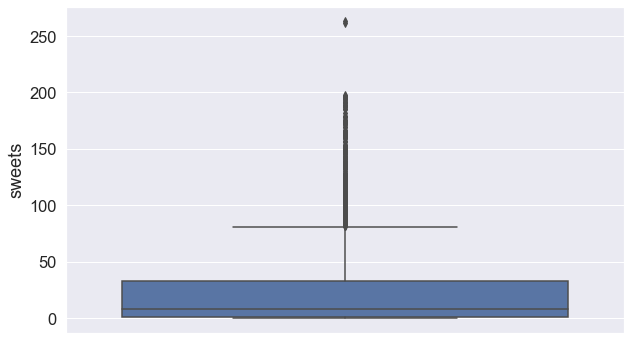

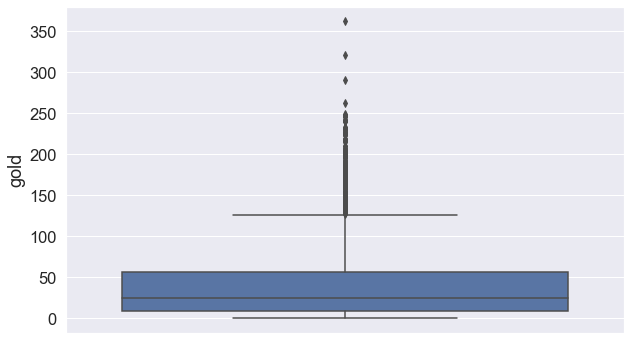

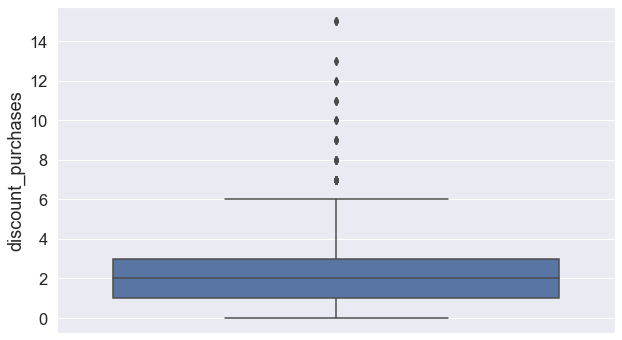

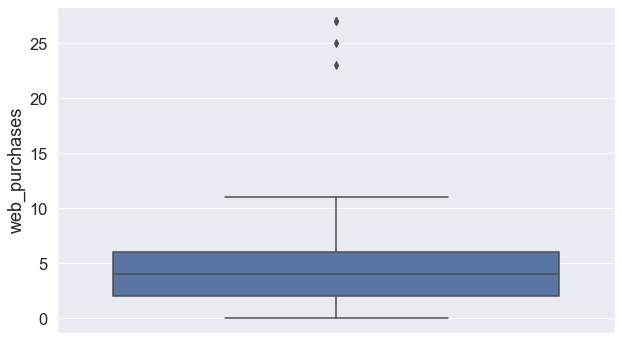

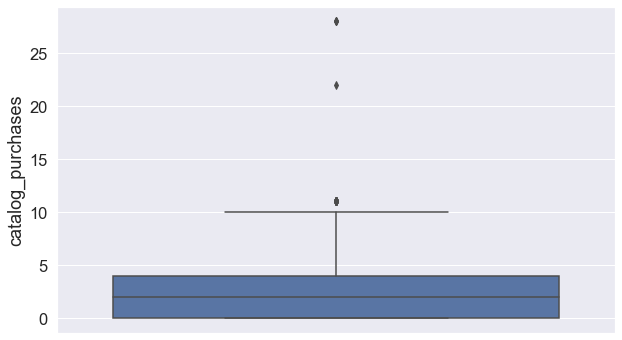

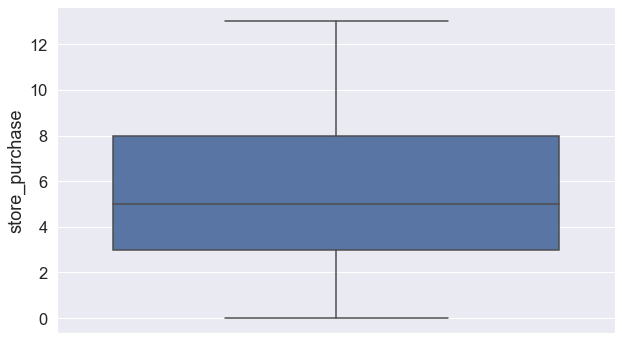

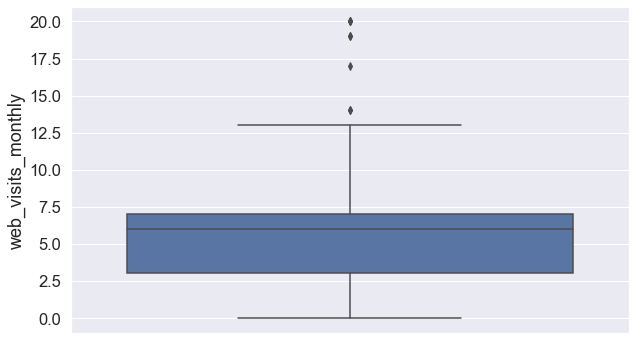

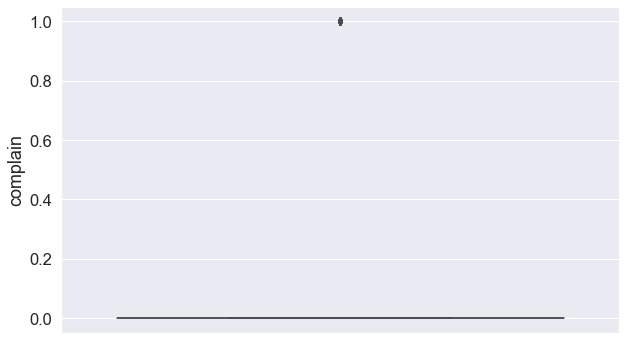

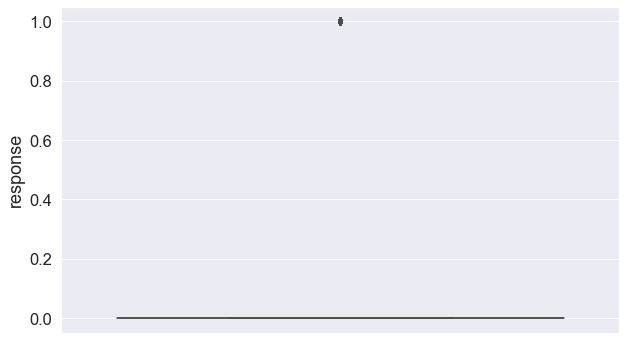

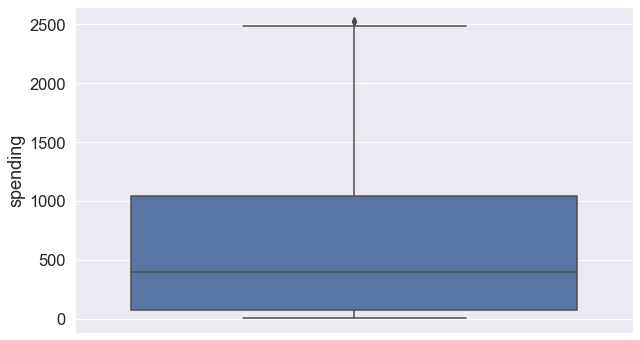

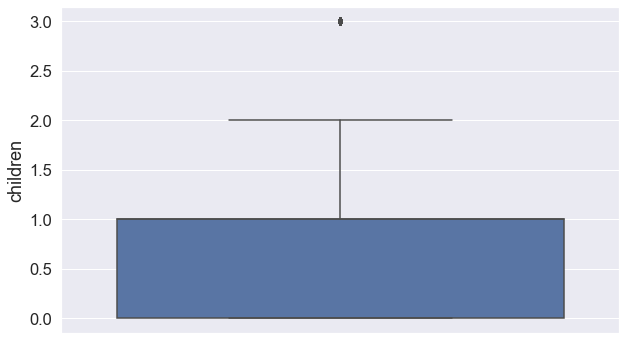

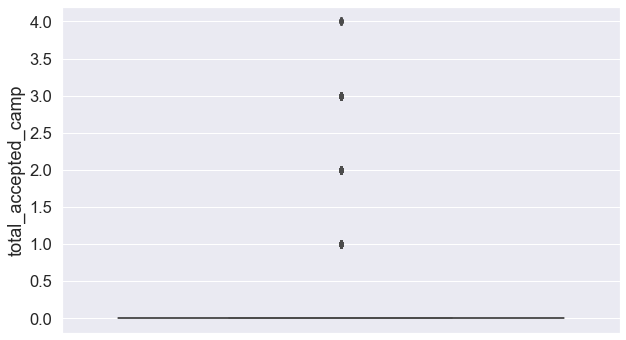

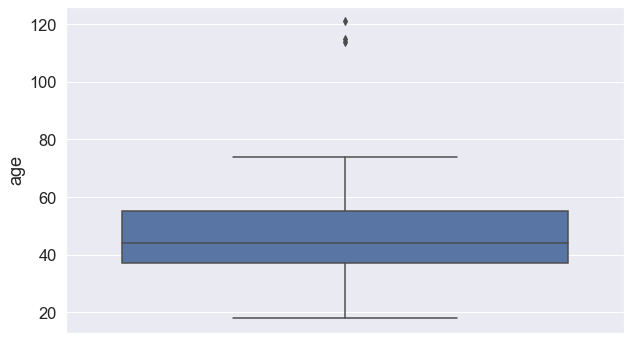

In [18]:
# Checking Outliers
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10,6)}, font_scale = 1.5)
for col in numerical_df.columns:
    sns.boxplot(y = numerical_df[col])
    plt.show()

Box plots shows that there are too many outliers in many variables. Therefore removing all of them will reduce our dataset to large extent,therefore we will first try to get results without removing outliers. 

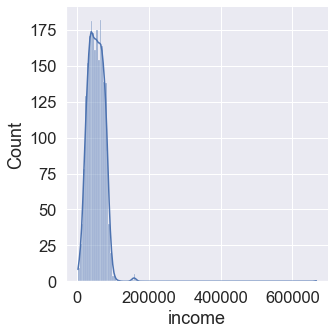

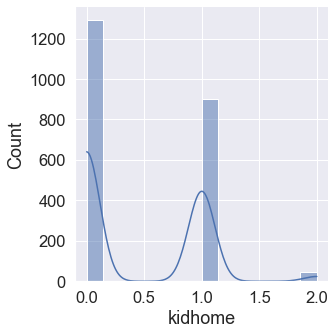

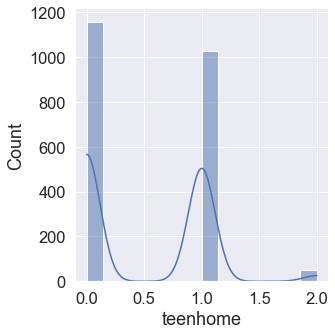

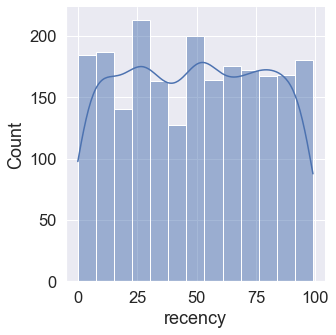

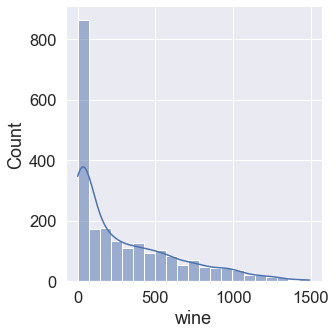

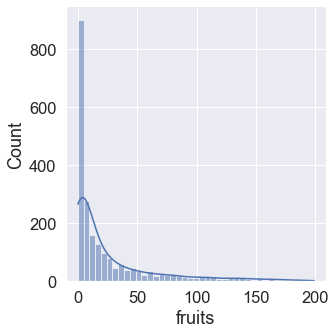

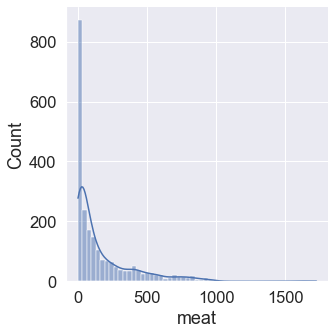

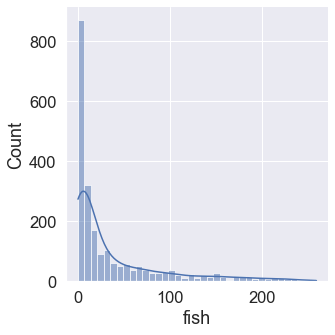

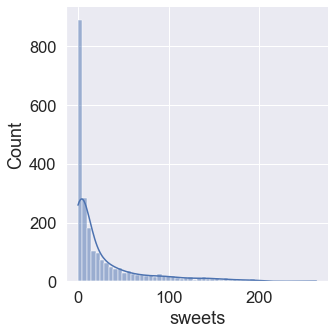

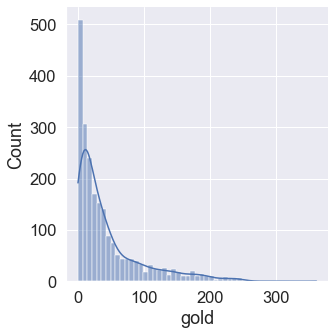

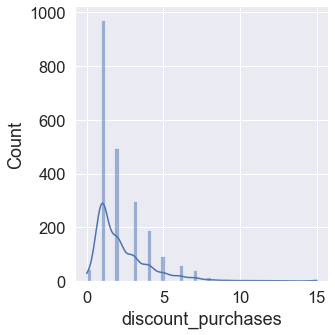

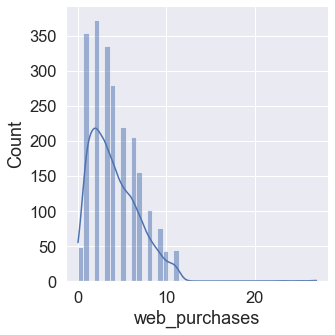

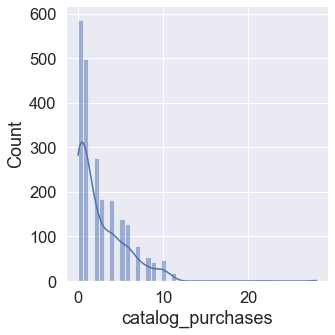

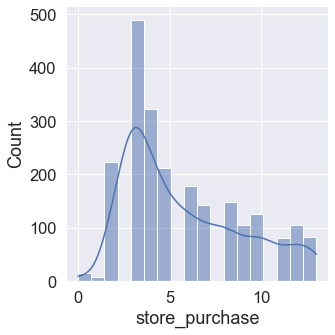

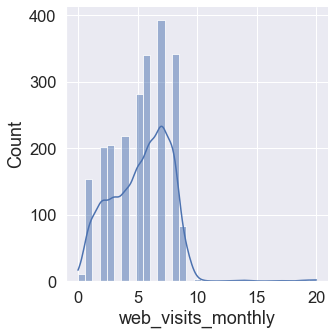

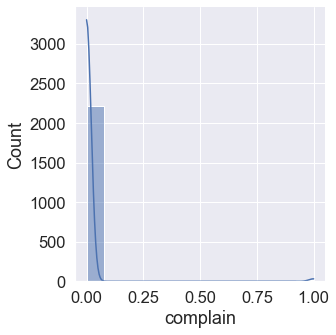

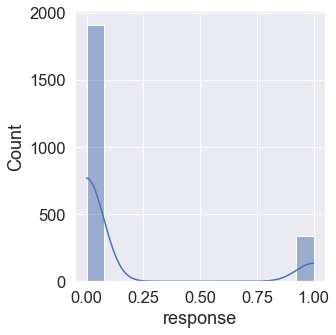

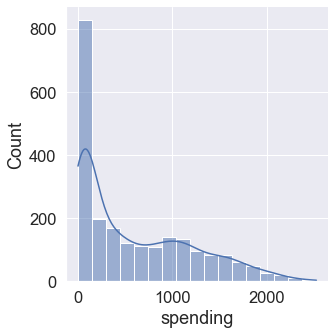

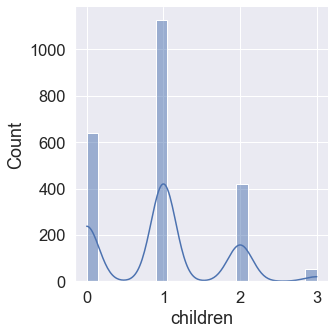

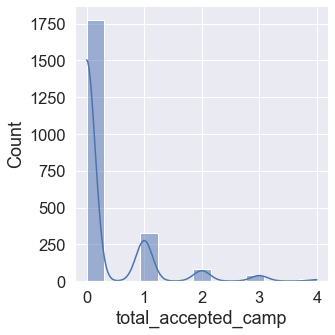

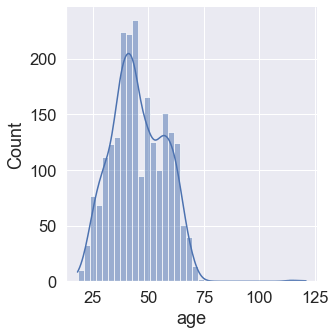

In [19]:
# Checking distribution of variables
sns.set(style = 'darkgrid', rc = {'figure.figsize':(10,6)}, font_scale = 1.5)
for col in numerical_df.columns:
    sns.displot(x = numerical_df[col], kde = True)
    plt.show()

In [20]:
#defining function to remove outliers through IQR
def remove_outlier_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data = data[~(
        (data[column] < (Q1 -1.5*IQR)) | (data[column] > (Q3 + 1.5*IQR)))]
    return data

In [21]:
df = remove_outlier_iqr(df,'income')
df = remove_outlier_iqr(df,'wine')
df = remove_outlier_iqr(df,'fruits')
df = remove_outlier_iqr(df,'meat')
df = remove_outlier_iqr(df,'fish')
df = remove_outlier_iqr(df,'sweets')
df = remove_outlier_iqr(df,'gold')
df = remove_outlier_iqr(df,'discount_purchases')
df = remove_outlier_iqr(df,'web_purchases')
df = remove_outlier_iqr(df, 'web_visits_monthly')

## Bivariate Anaylsis 

In [22]:
df.describe()

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,38266.556186,0.690213,0.540426,48.806809,106.925106,5.573617,34.039149,7.046809,4.801702,15.554894,2.174468,2.619574,0.847660,3.894468,6.255319,0.010213,0.094468,173.941277,1.230638,0.128511,43.920851
std,14268.700463,0.527956,0.547435,29.198013,192.753418,8.458002,44.584569,8.577457,5.792023,14.497318,1.297105,1.819109,1.229164,2.033140,1.724511,0.100584,0.292603,240.274398,0.673480,0.382312,11.503856
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,18.000000
25%,27708.000000,0.000000,0.000000,24.000000,9.000000,0.000000,8.000000,0.000000,0.000000,4.000000,1.000000,1.000000,0.000000,3.000000,5.000000,0.000000,0.000000,42.500000,1.000000,0.000000,36.000000
50%,37284.000000,1.000000,1.000000,49.000000,28.000000,3.000000,17.000000,4.000000,3.000000,11.000000,2.000000,2.000000,1.000000,3.000000,7.000000,0.000000,0.000000,74.000000,1.000000,0.000000,43.000000
75%,47869.500000,1.000000,1.000000,75.000000,109.000000,7.000000,43.000000,11.000000,7.000000,22.000000,3.000000,3.000000,1.000000,4.000000,8.000000,0.000000,0.000000,200.000000,2.000000,0.000000,52.000000
max,90247.000000,2.000000,2.000000,99.000000,1184.000000,71.000000,352.000000,47.000000,25.000000,67.000000,6.000000,8.000000,10.000000,13.000000,10.000000,1.000000,1.000000,1621.000000,3.000000,3.000000,121.000000


In [23]:
df_corr = df.corr()
df_corr

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
income,1.000000,-0.323333,0.490765,0.002584,0.622176,0.196557,0.556978,0.131827,0.130833,0.208167,0.104659,0.493190,0.523749,0.610281,-0.425694,-0.039075,-0.029921,0.629813,0.145448,0.203042,0.346621
kidhome,-0.323333,1.000000,-0.215982,0.021256,-0.437760,-0.228558,-0.318724,-0.195987,-0.180830,-0.231369,0.076503,-0.330349,-0.385178,-0.455025,0.276864,0.027548,0.029700,-0.443683,0.608362,-0.157079,-0.246526
teenhome,0.490765,-0.215982,1.000000,0.007976,0.262742,-0.054315,0.121280,-0.099176,-0.120103,0.042034,0.300147,0.220311,0.214864,0.293120,-0.230193,-0.022974,-0.106285,0.227470,0.643532,0.021960,0.542682
recency,0.002584,0.021256,0.007976,1.000000,-0.008862,0.036272,0.007348,0.025606,0.046957,0.021773,0.012046,0.012984,0.013871,0.012972,-0.027338,0.003863,-0.246018,-0.001109,0.023146,-0.033562,0.023749
wine,0.622176,-0.437760,0.262742,-0.008862,1.000000,0.346198,0.701301,0.211045,0.227388,0.336535,0.273177,0.650533,0.741090,0.832047,-0.169772,-0.031989,0.057742,0.977861,-0.129601,0.401405,0.186907
fruits,0.196557,-0.228558,-0.054315,0.036272,0.346198,1.000000,0.530365,0.499550,0.489431,0.319227,0.146384,0.353448,0.414222,0.396669,-0.117502,-0.027918,0.086158,0.460235,-0.223321,0.082814,0.023788
meat,0.556978,-0.318724,0.121280,0.007348,0.701301,0.530365,1.000000,0.465937,0.458219,0.424170,0.311694,0.625528,0.681689,0.705698,-0.166042,-0.032189,0.124296,0.820098,-0.151273,0.223980,0.116255
fish,0.131827,-0.195987,-0.099176,0.025606,0.211045,0.499550,0.465937,1.000000,0.475315,0.318552,0.143656,0.288723,0.323518,0.330416,-0.129568,-0.053868,0.009776,0.339724,-0.234254,-0.021837,-0.030167
sweets,0.130833,-0.180830,-0.120103,0.046957,0.227388,0.489431,0.458219,0.475315,1.000000,0.391840,0.162317,0.298421,0.368924,0.313230,-0.113207,-0.028687,0.109070,0.349386,-0.239382,-0.003484,-0.058376
gold,0.208167,-0.231369,0.042034,0.021773,0.336535,0.319227,0.424170,0.318552,0.391840,1.000000,0.320985,0.465781,0.454648,0.321347,0.008331,-0.033097,0.193051,0.441074,-0.147208,0.174770,0.059709


In [24]:
df_corr['response'].sort_values(ascending = False)

response               1.000000
total_accepted_camp    0.294945
web_visits_monthly     0.203680
gold                   0.193051
catalog_purchases      0.139518
discount_purchases     0.136080
meat                   0.124296
web_purchases          0.112383
sweets                 0.109070
spending               0.087045
fruits                 0.086158
wine                   0.057742
kidhome                0.029700
fish                   0.009776
complain              -0.003867
income                -0.029921
store_purchase        -0.044796
age                   -0.055473
children              -0.063111
teenhome              -0.106285
recency               -0.246018
Name: response, dtype: float64

In [25]:
# None of the two variables have corelation higher than 0.9. Multicollinearity does not exist in data. 
correlation = df.corr() # pearson correlation
mask = correlation > 0.9
correlation[mask]

,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
income,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kidhome,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teenhome,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recency,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wine,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977861,NaN,NaN,NaN
fruits,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meat,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


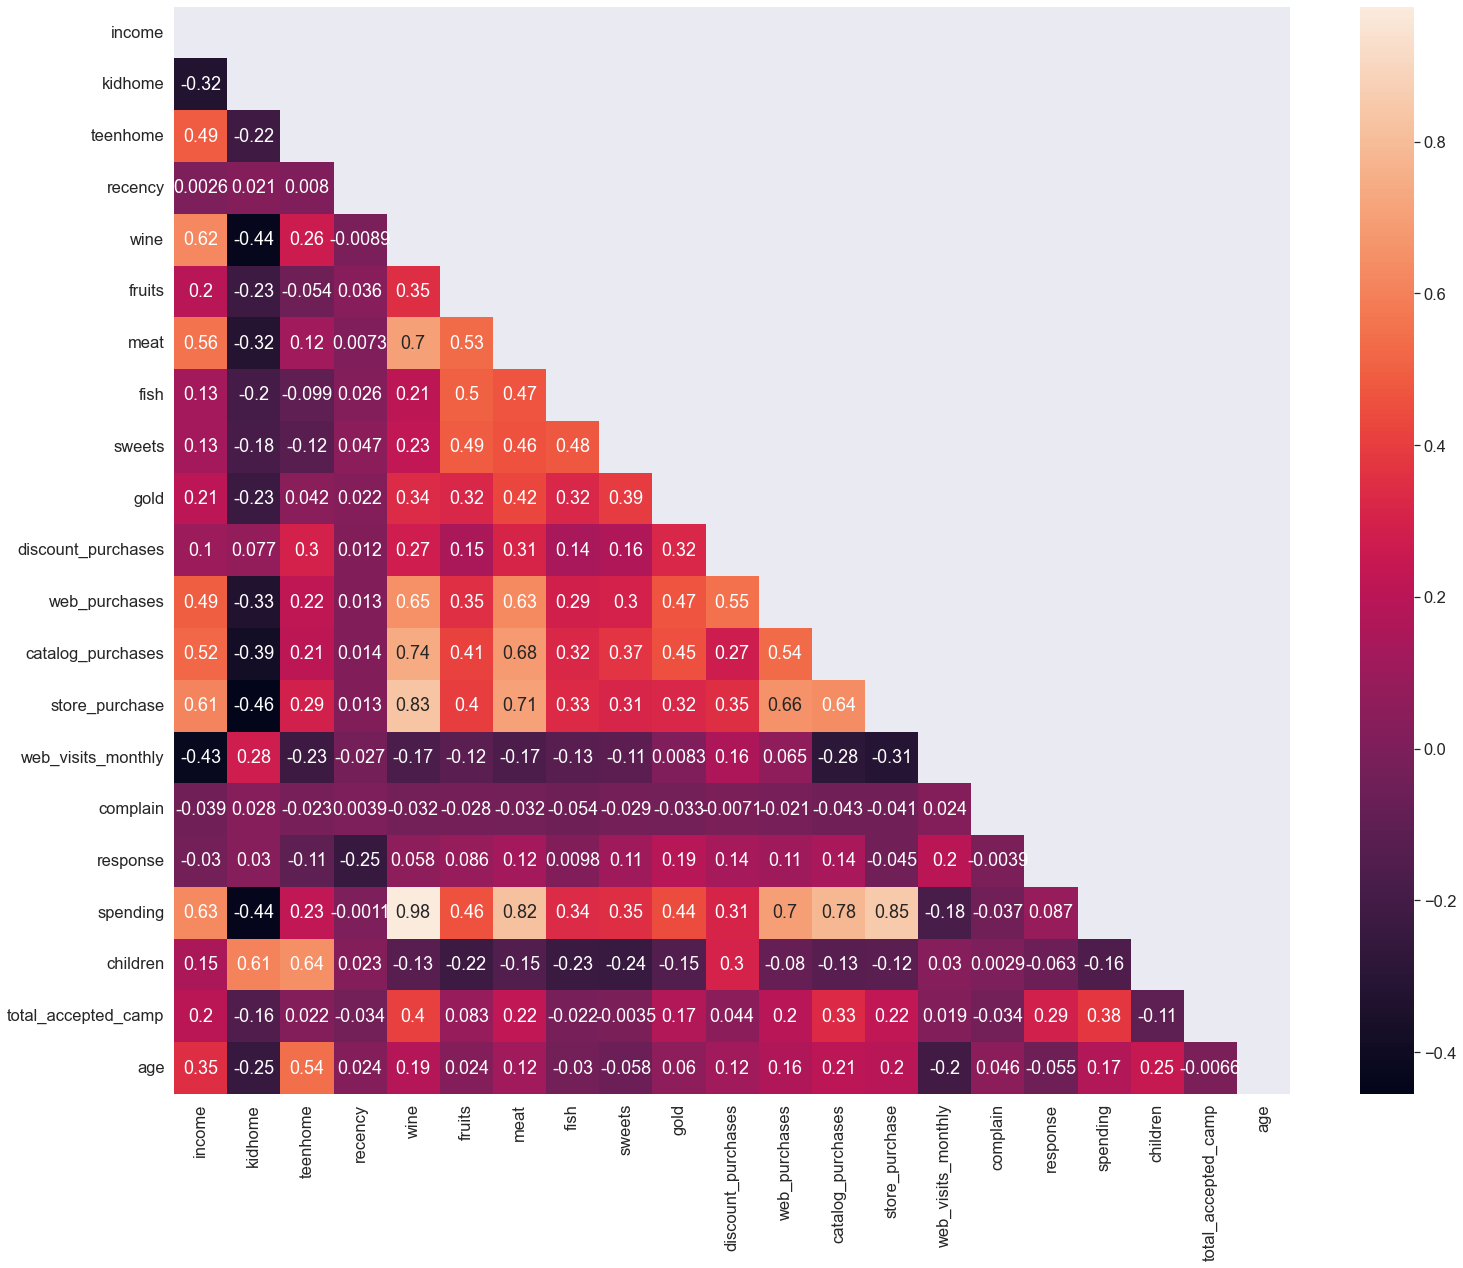

In [26]:
#heatmap
mask = np.zeros_like(correlation)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(correlation, mask=mask, cbar = True, annot=True)
plt.show()

### Ordinal Encoder to Categorical Variables 

As we need to convert all the variables to numerical before applying any model, so we have used ordinal encoder in order to change categorical variabels to numerical

In [27]:
# applying ordinal encoder to categorical variables.
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["education","marital_status"]])
df[["education","marital_status"]] = enc.transform(df[["education", "marital_status"]])
df

,education,marital_status,income,kidhome,teenhome,recency,wine,fruits,meat,fish,sweets,gold,discount_purchases,web_purchases,catalog_purchases,store_purchase,web_visits_monthly,complain,response,spending,children,total_accepted_camp,age
1,0.0,0.0,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,27,2,0,60
3,0.0,1.0,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,53,1,0,30
7,1.0,1.0,33454.000000,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,169,1,0,29
8,1.0,1.0,30351.000000,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,1,46,1,0,40
10,0.0,1.0,52247.251354,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,19,1,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,0.0,0.0,11012.000000,1,0,82,24,3,26,7,1,23,3,3,1,2,9,0,0,84,1,1,30
2232,0.0,0.0,26816.000000,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,22,0,0,28
2234,0.0,1.0,34421.000000,1,0,81,3,3,7,6,2,9,1,1,0,2,7,0,0,30,1,0,40
2237,0.0,0.0,56981.000000,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,1241,0,1,33


In [28]:
df.response.value_counts()

0    1064
1     111
Name: response, dtype: int64

### Feature Selection from Baseline Model using GridSearchCV 

Our focus is to maximize recall score, as we want to target only those users who will accept campaigns. 

In [29]:
data = df.copy()
X = data.drop(["response"], axis = 1)
X= pd.get_dummies(X)
y = data["response"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

sx = StandardScaler()
sx.fit_transform(X_train)
sx.transform(X_test)

param = {'C':[10**-2,10**-1,10**0,10**1,10**2]}
lr_model = LogisticRegression(penalty = 'l1', solver = 'liblinear')
gs_model = GridSearchCV(estimator = lr_model,param_grid = param)
gs_model.fit(X_train,y_train)
model = LogisticRegression(**gs_model.best_params_,penalty = 'l1', solver = 'liblinear')
model.fit(X_train,y_train)
coef = model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
print("Redundant Features Count:",sum(model.coef_[0]==0))
print("redundant features names:", list(pd.Series(X_train.columns[list(coef==0)])))
print("important features names:", list(pd.Series(X_train.columns[list(coef > 0)])))
gs_model.best_params_


Redundant Features Count: 2
redundant features names: ['kidhome', 'complain']
important features names: ['fruits', 'meat', 'sweets', 'gold', 'discount_purchases', 'catalog_purchases', 'web_visits_monthly', 'spending', 'total_accepted_camp', 'age']


{'C': 1}

In [30]:
feature_importance = pd.DataFrame({"Features": X_train.columns,
                                  "Value": coef})
sorted_data = feature_importance.sort_values(["Value"],ascending = False)
feature_importance["Value_abs"] = feature_importance["Value"].abs()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'total_accepted_camp'),
  Text(1, 0, 'store_purchase'),
  Text(2, 0, 'marital_status'),
  Text(3, 0, 'discount_purchases'),
  Text(4, 0, 'children'),
  Text(5, 0, 'web_visits_monthly'),
  Text(6, 0, 'teenhome'),
  Text(7, 0, 'catalog_purchases'),
  Text(8, 0, 'education'),
  Text(9, 0, 'web_purchases'),
  Text(10, 0, 'recency'),
  Text(11, 0, 'fish'),
  Text(12, 0, 'sweets'),
  Text(13, 0, 'meat'),
  Text(14, 0, 'gold'),
  Text(15, 0, 'age'),
  Text(16, 0, 'fruits'),
  Text(17, 0, 'spending'),
  Text(18, 0, 'wine'),
  Text(19, 0, 'income'),
  Text(20, 0, 'complain'),
  Text(21, 0, 'kidhome')])

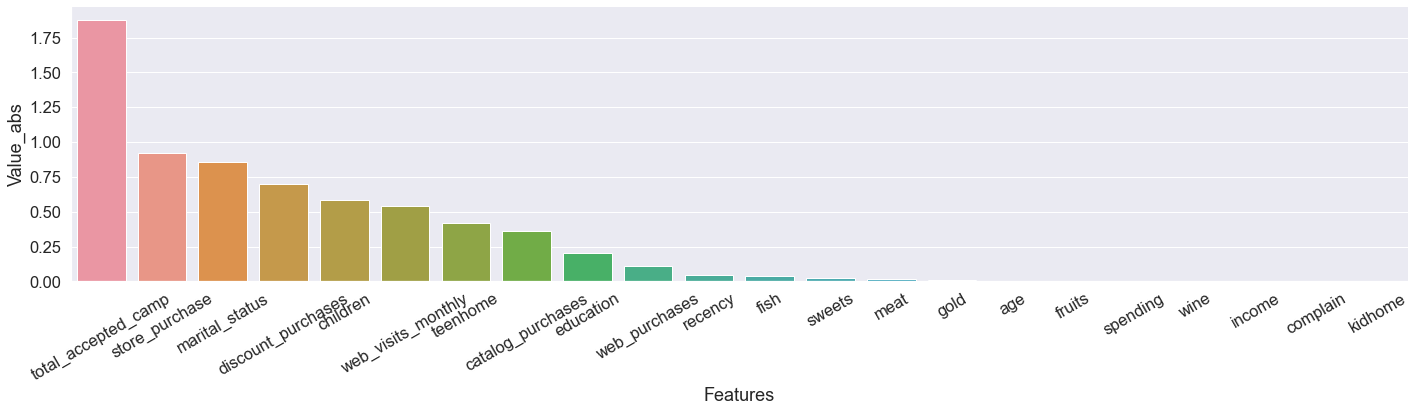

In [31]:
sns.catplot(x = "Features",
            y = "Value_abs",
            data = feature_importance.sort_values(by = "Value_abs", ascending = False),
            kind ="bar", aspect= 20/5)
plt.xticks(rotation=30)

In [32]:
def model_inplace(scaler,model,X_train,X_test,y_train,y_test):
    data = df
    X = data.drop(["response"], axis = 1)
    y = data["response"]
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print(model)
    print("score on train set:", model.score(X_train,y_train))
    print("score on test set:", model.score(X_test,y_test))
    print("f1 score on train set:", f1_score(y_train,pred_train))
    print("F1 score on trest set:", f1_score(y_test,pred_test))
    print('Recall train: %.3f' % recall_score(y_train, pred_train))
    print('Recall test: %.3f' % recall_score(y_test, pred_test))
    print(ConfusionMatrixDisplay.from_estimator(model, X_test, y_test))
    print(RocCurveDisplay.from_estimator(model, X_test, y_test))

In [33]:
from sklearn.tree import DecisionTreeClassifier
lr = LogisticRegression()
lr_hyper_parameter = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', class_weight='balanced')
scaler1 = StandardScaler()

In [34]:
sm = SMOTE(k_neighbors = 2)  
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

LogisticRegression()
score on train set: 0.9351063829787234
score on test set: 0.9234042553191489
f1 score on train set: 0.6013071895424836
F1 score on trest set: 0.4375
Recall train: 0.500
Recall test: 0.368


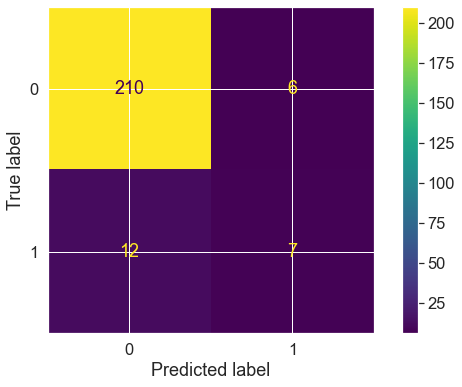

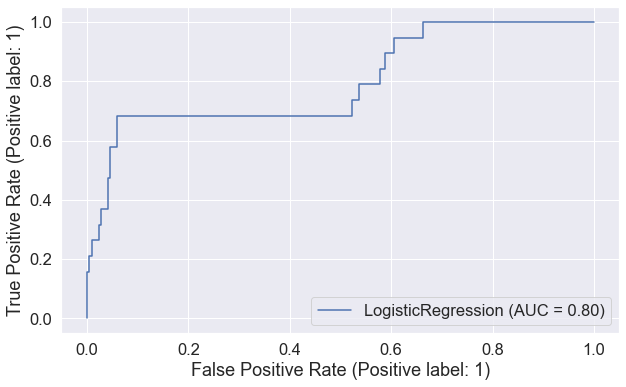

In [35]:
model_inplace(scaler1,lr, X_train_SMOTE,X_test,y_train_SMOTE,y_test)


Simple logistic model is providing good accuracy score but Recall score is more good for train data as compared to test data.

LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                   solver='liblinear')
score on train set: 0.8659574468085106
score on test set: 0.7957446808510639
f1 score on train set: 0.5684931506849314
F1 score on trest set: 0.35135135135135137
Recall train: 0.902
Recall test: 0.684


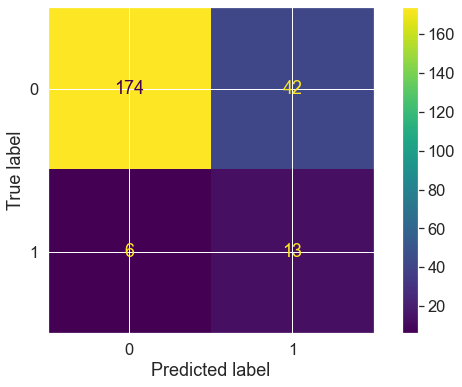

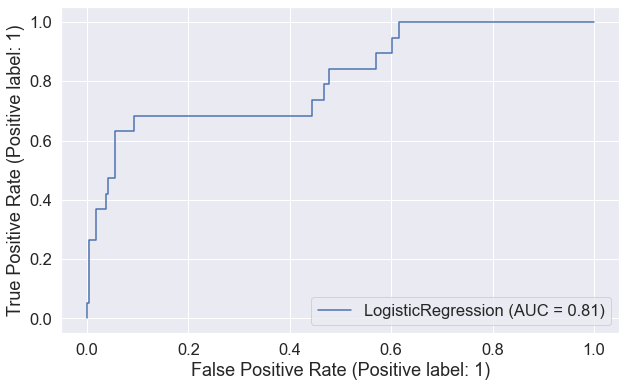

In [36]:
model_inplace(scaler1,lr_hyper_parameter,X_train,X_test,y_train,y_test)

Using Logistic Regression with Hyper parameters has improved the model a lot. Recall score improved a lot. But model is overfitting.

### Confidence Interval for Test Data

In [45]:
# Confidence Interval for Class 1 using Hyper_parameter_logistic_regression
from scipy import stats
import math as m
def confidence_interval_proportion(confidence_level):
    n = 13 # predicted True value for 1
    p = 13/19
    t = stats.t.ppf(confidence_level+(1- confidence_level)/2, df=n-1)
    error = t * m.sqrt(p*(1-p)/n)
    confidence_interval = [p -error, p+ error]
    return confidence_interval
CI = confidence_interval_proportion(0.90)
CI

[0.45443710072354115, 0.9139839519080378]

Confidence interval shows that proportion of recall (i.e. proporions of actual positive identified correctly) for population lies between 0.45 to 0.90. Confidence interval is very wide. Model is not performing good.

## Decision Tree, Random Forest and KNN¶

As target variable is very imbalance, therefore we will use SMOTE on all models.

In [38]:
sm = SMOTE(k_neighbors = 15)  # maximum accuracy is approachable at 15 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [39]:
def model(model,X_train,X_test,y_train,y_test):
    data = df
    X = data.drop(["response"], axis = 1)
    y = data["response"]
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("score on train set:", model.score(X_train,y_train))
    print("score on test set:", model.score(X_test,y_test))
    print("f1 score on train set:", f1_score(y_train,pred_train))
    print("F1 score on trest set:", f1_score(y_test,pred_test))
    print('Recall train: %.3f' % recall_score(y_train, pred_train))
    print('Recall test: %.3f' % recall_score(y_test, pred_test))

#Hyper parameter tunning on Random Forest
params = {'bootstrap': [True],'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'n_estimators': [20,30,50,100,200,300]}
grid = GridSearchCV(estimator = RandomForestClassifier(),  param_grid= params, cv=5, scoring = 'accuracy')

grid.fit(X_train, y_train)
grid.best_params_

In [40]:
decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(n_estimators=30, max_depth=9, criterion='gini' ,random_state = 0, bootstrap = True)
KNN = KNeighborsClassifier(n_neighbors=3)

In [41]:
sm = SMOTE(k_neighbors = 2)  # maximum accuracy is approachable at 15 
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [42]:
model(random_forest,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

score on train set: 0.9787234042553191
score on test set: 0.8936170212765957
f1 score on train set: 0.8823529411764706
F1 score on trest set: 0.2857142857142857
Recall train: 0.815
Recall test: 0.263


In [43]:
model(decision_tree,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

score on train set: 0.9904255319148936
score on test set: 0.851063829787234
f1 score on train set: 0.9485714285714286
F1 score on trest set: 0.2553191489361702
Recall train: 0.902
Recall test: 0.316


In [44]:
model(KNN,X_train_SMOTE,X_test,y_train_SMOTE,y_test)

score on train set: 0.9138297872340425
score on test set: 0.9148936170212766
f1 score on train set: 0.4
F1 score on trest set: 0.09090909090909091
Recall train: 0.293
Recall test: 0.053


All the models KNN, Random forest with and without hyper parameter tunning, decision tree are overfitting after removing outliers. So removing outliers was not good option. Model performed better without removing outliers